### Import Library

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

### Import Data

In [6]:
AAPL_df = pd.read_csv(r"C:\Users\PC\Downloads\Data Science\project\AAPL.csv")
AAPL_df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [7]:
AAPL_df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500
2010,2019-12-30,289.459991,292.690002,285.220001,291.519989,289.522614,36028600


## EDA

In [8]:
type(AAPL_df)

pandas.core.frame.DataFrame

In [9]:
AAPL_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There are no null values in the dataset

In [10]:
AAPL_df.shape

(2011, 7)

In [11]:
print('Dates available are from : ',AAPL_df.Date.iloc[0],'to',AAPL_df.Date.iloc[-1])

Dates available are from :  2012-01-03 to 2019-12-30


In [12]:
AAPL_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

We have to convert Date column data from object to date type




In [13]:
AAPL_df["Date"] = pd.to_datetime(AAPL_df.Date)

In [14]:
AAPL_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

Creating year and month column for EDA

In [15]:
AAPL_df['Year'] = AAPL_df['Date'].dt.year
AAPL_df['Month'] = AAPL_df['Date'].dt.month
AAPL_df['Quater'] = AAPL_df['Date'].dt.quarter
AAPL_df['Week'] = AAPL_df['Date'].dt.week
AAPL_df.head(2)

C:\Users\PC\AppData\Local\Temp\ipykernel_7756\2966061078.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  AAPL_df['Week'] = AAPL_df['Date'].dt.week


,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Quater,Week
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,2012,1,1,1
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,2012,1,1,1


In [16]:
AAPL_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Quater,Week
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03,2011.000000,2011.000000,2011.000000,2011.000000
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07,2015.499751,6.534560,2.513178,26.607658
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07,2.289795,3.422369,1.113553,14.935974
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07,2012.000000,1.000000,1.000000,1.000000
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07,2014.000000,4.000000,2.000000,14.000000
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07,2015.000000,7.000000,3.000000,27.000000
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07,2017.000000,10.000000,4.000000,40.000000
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08,2019.000000,12.000000,4.000000,53.000000


### Check Missing Dates

In [17]:
AAPL_df.Year.value_counts()

2013    252
2014    252
2015    252
2016    252
2017    251
2018    251
2019    251
2012    250
Name: Year, dtype: int64

In [18]:
!pip install holidays

In [19]:
# Holidays in US
import holidays
country = 'US'
holidays_list= pd.DataFrame(holidays.US(years=[2012,2013,2014,2015,2016,2017,2018,2019]),index=[0])
holidays_list=holidays_list.transpose() 
holidays_list.reset_index(inplace=True)
holidays_list.head(50)

,index,0
0,2016-01-01,New Year's Day
1,2016-01-18,Martin Luther King Jr. Day
2,2016-02-15,Washington's Birthday
3,2016-05-30,Memorial Day
4,2016-07-04,Independence Day
5,2016-09-05,Labor Day
6,2016-10-10,Columbus Day
7,2016-11-11,Veterans Day
8,2016-11-24,Thanksgiving
9,2016-12-25,Christmas Day


In [20]:
np.array(holidays_list['index'])

array([datetime.date(2016, 1, 1), datetime.date(2016, 1, 18),
       datetime.date(2016, 2, 15), datetime.date(2016, 5, 30),
       datetime.date(2016, 7, 4), datetime.date(2016, 9, 5),
       datetime.date(2016, 10, 10), datetime.date(2016, 11, 11),
       datetime.date(2016, 11, 24), datetime.date(2016, 12, 25),
       datetime.date(2016, 12, 26), datetime.date(2017, 1, 1),
       datetime.date(2017, 1, 2), datetime.date(2017, 1, 16),
       datetime.date(2017, 2, 20), datetime.date(2017, 5, 29),
       datetime.date(2017, 7, 4), datetime.date(2017, 9, 4),
       datetime.date(2017, 10, 9), datetime.date(2017, 11, 11),
       datetime.date(2017, 11, 10), datetime.date(2017, 11, 23),
       datetime.date(2017, 12, 25), datetime.date(2018, 1, 1),
       datetime.date(2018, 1, 15), datetime.date(2018, 2, 19),
       datetime.date(2018, 5, 28), datetime.date(2018, 7, 4),
       datetime.date(2018, 9, 3), datetime.date(2018, 10, 8),
       datetime.date(2018, 11, 11), datetime.date(2018, 

In [21]:
import datetime

start = datetime.date(2012, 1, 1)
end = datetime.date(2019, 12, 30)

days = np.busday_count(start, end,holidays=[datetime.date(2016, 1, 1), datetime.date(2016, 1, 18),
       datetime.date(2016, 2, 15), datetime.date(2016, 5, 30),
       datetime.date(2016, 7, 4), datetime.date(2016, 9, 5),
       datetime.date(2016, 10, 10), datetime.date(2016, 11, 11),
       datetime.date(2016, 11, 24), datetime.date(2016, 12, 25),
       datetime.date(2016, 12, 26), datetime.date(2017, 1, 1),
       datetime.date(2017, 1, 2), datetime.date(2017, 1, 16),
       datetime.date(2017, 2, 20), datetime.date(2017, 5, 29),
       datetime.date(2017, 7, 4), datetime.date(2017, 9, 4),
       datetime.date(2017, 10, 9), datetime.date(2017, 11, 11),
       datetime.date(2017, 11, 10), datetime.date(2017, 11, 23),
       datetime.date(2017, 12, 25), datetime.date(2018, 1, 1),
       datetime.date(2018, 1, 15), datetime.date(2018, 2, 19),
       datetime.date(2018, 5, 28), datetime.date(2018, 7, 4),
       datetime.date(2018, 9, 3), datetime.date(2018, 10, 8),
       datetime.date(2018, 11, 11), datetime.date(2018, 11, 12),
       datetime.date(2018, 11, 22), datetime.date(2018, 12, 25),
       datetime.date(2019, 1, 1), datetime.date(2019, 1, 21),
       datetime.date(2019, 2, 18), datetime.date(2019, 5, 27),
       datetime.date(2019, 7, 4), datetime.date(2019, 9, 2),
       datetime.date(2019, 10, 14), datetime.date(2019, 11, 11),
       datetime.date(2019, 11, 28), datetime.date(2019, 12, 25),
       datetime.date(2012, 1, 1), datetime.date(2012, 1, 2),
       datetime.date(2012, 1, 16), datetime.date(2012, 2, 20),
       datetime.date(2012, 5, 28), datetime.date(2012, 7, 4),
       datetime.date(2012, 9, 3), datetime.date(2012, 10, 8),
       datetime.date(2012, 11, 11), datetime.date(2012, 11, 12),
       datetime.date(2012, 11, 22), datetime.date(2012, 12, 25),
       datetime.date(2013, 1, 1), datetime.date(2013, 1, 21),
       datetime.date(2013, 2, 18), datetime.date(2013, 5, 27),
       datetime.date(2013, 7, 4), datetime.date(2013, 9, 2),
       datetime.date(2013, 10, 14), datetime.date(2013, 11, 11),
       datetime.date(2013, 11, 28), datetime.date(2013, 12, 25),
       datetime.date(2014, 1, 1), datetime.date(2014, 1, 20),
       datetime.date(2014, 2, 17), datetime.date(2014, 5, 26),
       datetime.date(2014, 7, 4), datetime.date(2014, 9, 1),
       datetime.date(2014, 10, 13), datetime.date(2014, 11, 11),
       datetime.date(2014, 11, 27), datetime.date(2014, 12, 25),
       datetime.date(2015, 1, 1), datetime.date(2015, 1, 19),
       datetime.date(2015, 2, 16), datetime.date(2015, 5, 25),
       datetime.date(2015, 7, 4), datetime.date(2015, 7, 3),
       datetime.date(2015, 9, 7), datetime.date(2015, 10, 12),
       datetime.date(2015, 11, 11), datetime.date(2015, 11, 26),
       datetime.date(2015, 12, 25)])
       
print('Number of business days is:', days)

Number of business days is: 2005


It appears there is a difference between bussiness days vs AAPL data i.e. 2005 days vs 2011 days. Thus checking for duplicate value.

In [22]:
AAPL_df.duplicated().value_counts()

False    2011
dtype: int64

There are no duplicates value. 

It is understand that business holidays and trading holidays can be different. Thus Comparing the data from below trading days in US.

Year ->  Trading Days

2012 ->  250   (closed 2 days extra due to Hurricane Sandy)

2013 ->  252

2014 ->  252

2015 ->  252

2016 ->  252

2017 ->  251

2018 ->  251

2019 ->  252

Note - Data taken from open source - https://www.nyse.com/markets/hours-calendars

Summing up the total trading days is equal to 2012 days vs our data of 2011 trading days.

As the AAPL data is given till only 30th dec 2019 and not till 31st dec 2019 there is a difference of 1 trading day. 

Thus we can conclude that is no missing records for the given time series data.

### Feature Engineering

In [23]:
AAPL_df['Daily returns'] = AAPL_df['Adj Close'].pct_change(1)
AAPL_df['Traded volume'] = AAPL_df['Adj Close'] * AAPL_df['Volume']

In [24]:
AAPL_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Quater,Week,Daily returns,Traded volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,2012,1,1,1,NaN,3.835613e+09
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,2012,1,1,1,0.005374,3.317786e+09


In [25]:
AAPL_df[['Adj Close','Daily returns','Traded volume']].describe()

,Adj Close,Daily returns,Traded volume
count,2011.000000,2010.000000,2.011000e+03
mean,119.505548,0.000997,5.719886e+09
std,52.438444,0.016107,2.987541e+09
min,48.921928,-0.123558,1.217102e+09
25%,75.056679,-0.006600,3.725268e+09
50%,105.222908,0.000871,4.920565e+09
75%,160.047111,0.009621,6.801713e+09
max,289.522614,0.088741,2.581685e+10


### Visualization

In [26]:
#AAPL_df['Year-Week'] = AAPL_df['Date'].dt.strftime('%Y-%U')
#AAPL_df['Month'] = AAPL_df['Date'].dt.strftime('%Y-%m')
#AAPL_df['quarter'] = pd.PeriodIndex(AAPL_df.Date, freq='Q')

AAPL_df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Quater,Week,Daily returns,Traded volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,2012,1,1,1,NaN,3.835613e+09
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,2012,1,1,1,0.005374,3.317786e+09
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,2012,1,1,1,0.011102,3.499729e+09
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,2012,1,1,1,0.010454,4.149315e+09
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,2012,1,1,2,-0.001586,5.128418e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000,2019,12,4,52,0.016318,6.950660e+09
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700,2019,12,4,52,0.000951,3.421661e+09
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300,2019,12,4,52,0.019840,6.702949e+09
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500,2019,12,4,52,-0.000379,1.052436e+10


C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


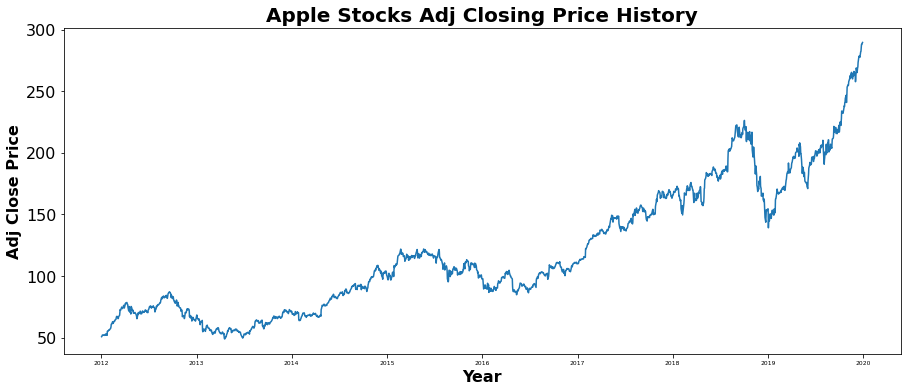

In [27]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(AAPL_df['Date'], AAPL_df['Adj Close'] )

# Formatting
ax.set_title('Apple Stocks Adj Closing Price History', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Adj Close Price', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=6)

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


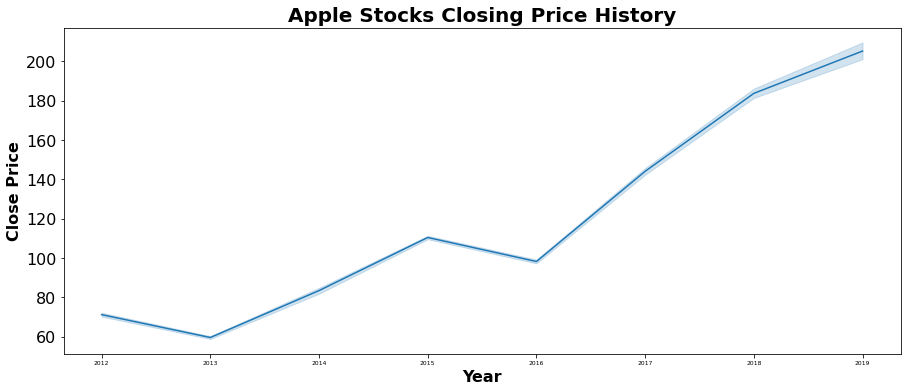

In [28]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(AAPL_df['Year'], AAPL_df['Adj Close'] )

# Formatting
ax.set_title('Apple Stocks Closing Price History', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Close Price', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=6)

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


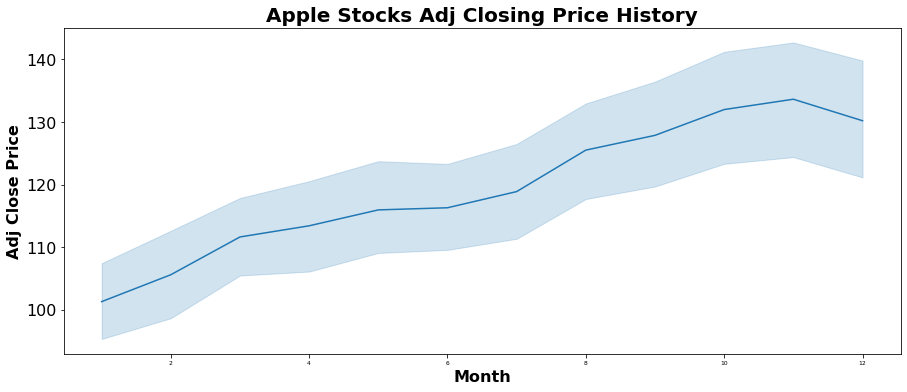

In [29]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(AAPL_df['Month'], AAPL_df['Adj Close'] )

# Formatting
ax.set_title('Apple Stocks Adj Closing Price History', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Adj Close Price', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=6)

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


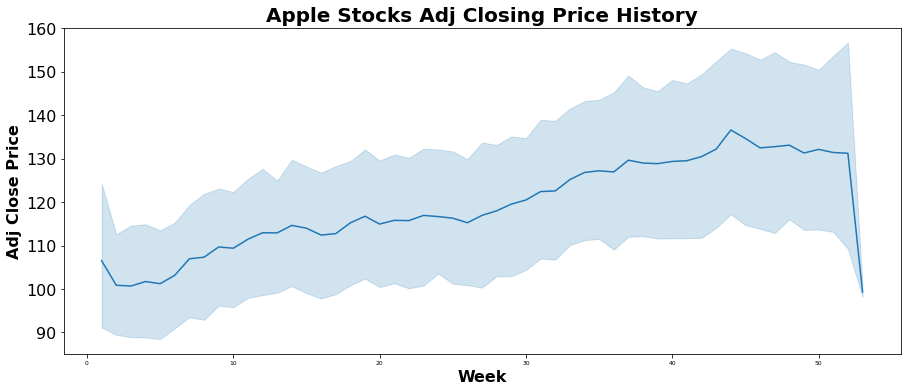

In [30]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(AAPL_df['Week'], AAPL_df['Adj Close'] )

# Formatting
ax.set_title('Apple Stocks Adj Closing Price History', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Week', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Adj Close Price', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=6)

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


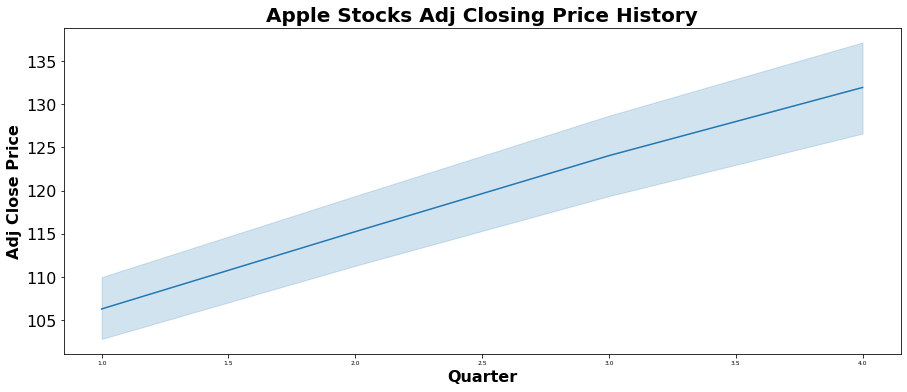

In [31]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot( AAPL_df['Quater'],  AAPL_df['Adj Close'] )

# Formatting
ax.set_title('Apple Stocks Adj Closing Price History', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Quarter', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Adj Close Price', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=6)

In [32]:
pip install altair

  Using cached altair-4.2.0-py3-none-any.whl (812 kB)



In [33]:
Ap=AAPL_df.groupby(by='Adj Close').mean().reset_index()
Ap

,Adj Close,Open,High,Low,Close,Volume,Year,Month,Quater,Week,Daily returns,Traded volume
0,48.921928,55.424286,57.085712,55.014286,55.790001,152318600.0,2013.0,4.0,2.0,16.0,-0.003877,7.451720e+09
1,49.112339,57.855713,57.970001,55.677143,56.007141,166574800.0,2013.0,4.0,2.0,16.0,-0.026688,8.180878e+09
2,49.655571,57.035713,57.341427,56.220001,56.254284,84311500.0,2013.0,6.0,2.0,26.0,-0.010777,4.186536e+09
3,49.941639,56.091427,57.457142,55.895714,56.952858,107480100.0,2013.0,4.0,2.0,17.0,0.020844,5.367732e+09
4,50.002346,55.908573,57.181427,55.552856,56.647144,144629100.0,2013.0,6.0,2.0,26.0,0.006984,7.231794e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
1978,282.054138,280.529999,284.250000,280.369995,284.000000,24643000.0,2019.0,12.0,4.0,52.0,0.016318,6.950660e+09
1979,282.322266,284.690002,284.890015,282.920013,284.269989,12119700.0,2019.0,12.0,4.0,52.0,0.000951,3.421661e+09
1980,287.814392,291.119995,293.970001,288.119995,289.799988,36566500.0,2019.0,12.0,4.0,52.0,-0.000379,1.052436e+10
1981,287.923645,284.820007,289.980011,284.700012,289.910004,23280300.0,2019.0,12.0,4.0,52.0,0.019840,6.702949e+09


In [34]:
import altair as alt
alt.Chart( AAPL_df.reset_index()).mark_line(point=True).encode(
    x='Year', 
    y='Adj Close',
    column='Quater',
    tooltip=['Date', 'Adj Close']).properties(
    title="Quarter",
    width=100).configure_header(
    titleColor='black',
    titleFontSize=14,
    labelColor='blue',
    labelFontSize=14
)

alt.Chart(...)

In [35]:
import altair as alt
alt.Chart( AAPL_df.reset_index()).mark_line(point=True).encode(
    x='Quater', 
    y='Adj Close',
    column='Year',
    tooltip=['Date', 'Adj Close']).properties(
    title="Quarter",
    width=100).configure_header(
    titleColor='black',
    titleFontSize=14,
    labelColor='blue',
    labelFontSize=14
)

alt.Chart(...)

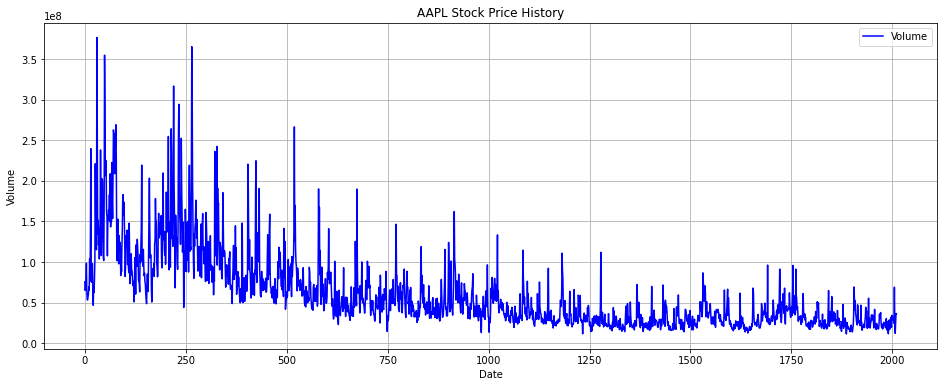

In [37]:
AAPL_df[['Volume']].plot(figsize=(16,6),color='blue')
plt.title("AAPL Stock Price History")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid();

The above gragh shows decreasing in volume trend of AAPL stock. 

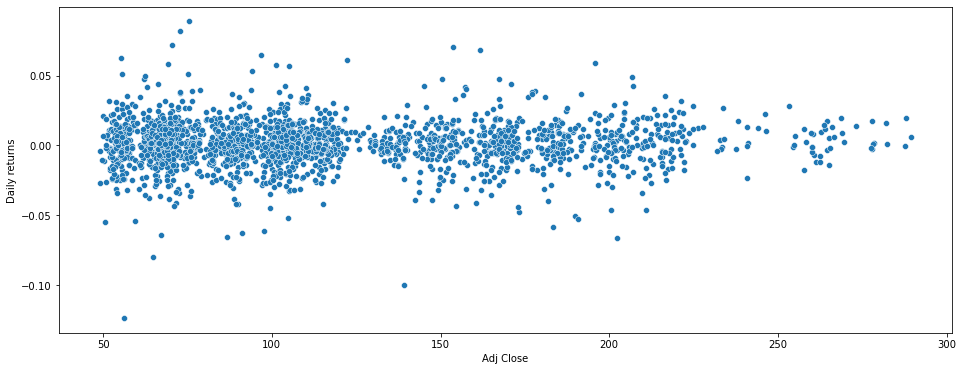

In [38]:
_, ax = plt.subplots(figsize=(16,6))
sns.scatterplot(x='Adj Close',y='Daily returns',palette="flare",data=AAPL_df,ax=ax)
plt.show()

From above graph we can say at 50 quartile the daily return of Apple stock ranges between -0.6% to 0.9%

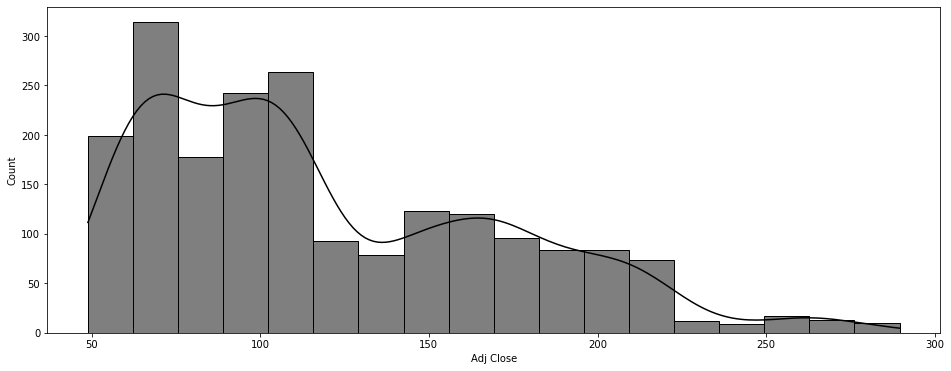

In [39]:
_, ax = plt.subplots(figsize=(16,6))
sns.histplot(data=AAPL_df,x='Adj Close',kde=True,color='black')
plt.show()

It seems the data is positively skewed. Thus we have to apply tranformations method to the data. Preferable we can apply log tranformation as the stock price has increased exponentially. 

Text(0, 0.5, 'Price')

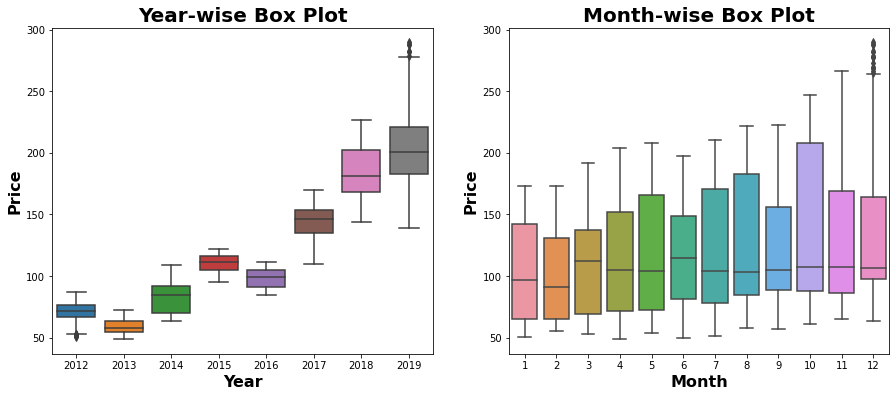

In [40]:
variable = AAPL_df

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.boxplot(data=AAPL_df, x='Year', y = 'Adj Close', ax=ax[0])
ax[0].set_title('Year-wise Box Plot', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(data=AAPL_df, x='Month', y = 'Adj Close', ax=ax[1])
ax[1].set_title('Month-wise Box Plot', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))

Form the above Year-Wise and Month-Wise Box Plot we can see there is few outliers, no seasonality present and an uptrend for the last 4 year.

### Transformations

#### Log transformation

In [36]:
AAPL_df_log = np.log(AAPL_df['Adj Close'])

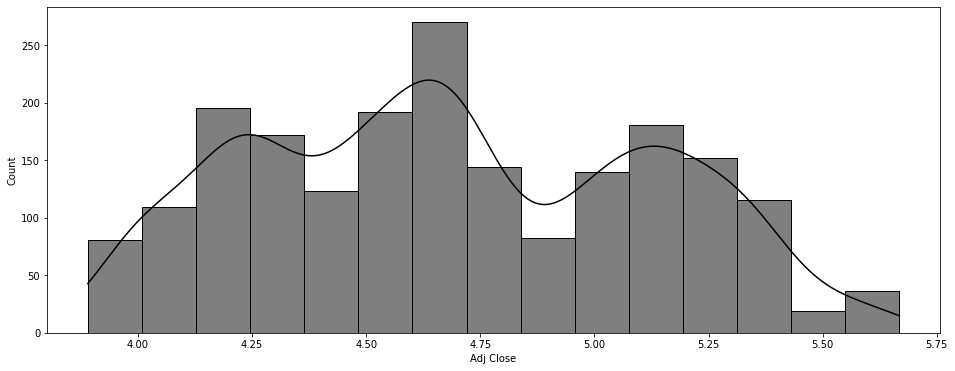

In [37]:
_, ax = plt.subplots(figsize=(16,6))
sns.histplot(data=AAPL_df_log,x=AAPL_df_log,kde=True,color='black')
plt.show()

#### Square Root

In [38]:
AAPL_df_sq = np.sqrt(AAPL_df['Adj Close'])

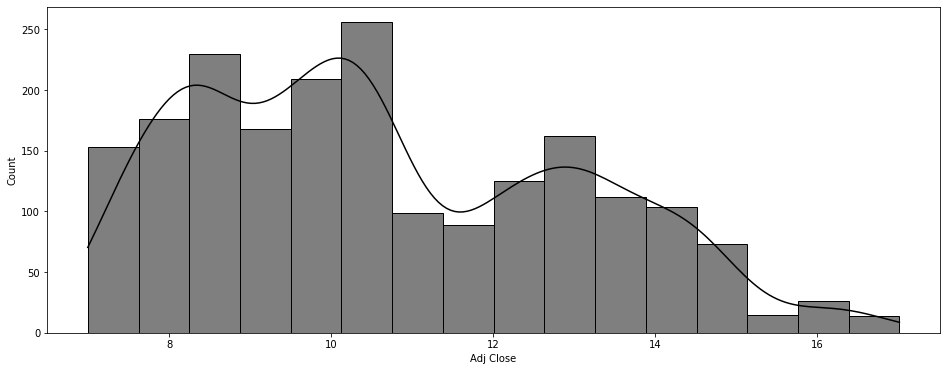

In [39]:
_, ax = plt.subplots(figsize=(16,6))
sns.histplot(data=AAPL_df_sq,x=AAPL_df_sq,kde=True,color='black')
plt.show()

#### Box Plot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Price')

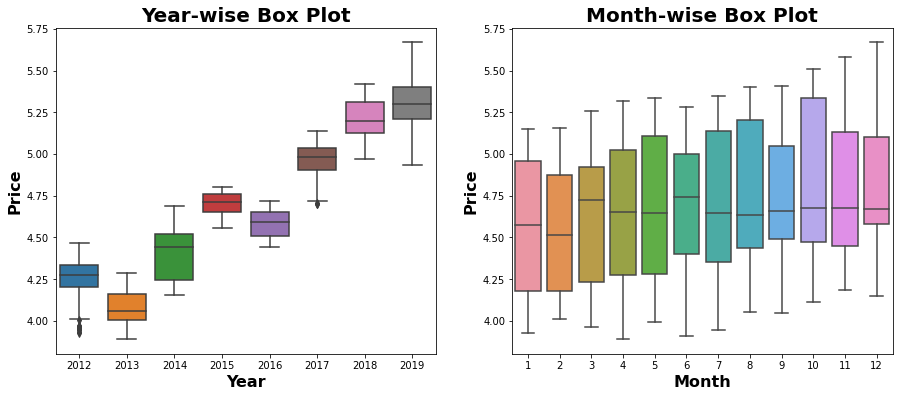

In [40]:
variable = AAPL_df_log

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.boxplot(AAPL_df['Year'], variable, ax=ax[0])
ax[0].set_title('Year-wise Box Plot', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(AAPL_df['Month'],variable, ax=ax[1])
ax[1].set_title('Month-wise Box Plot', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))

Form the above Year-Wise Box Plot we can see there is few outliers, no seasonality present and an uptrend for the last 4 year.


### Heatmap

<AxesSubplot:>

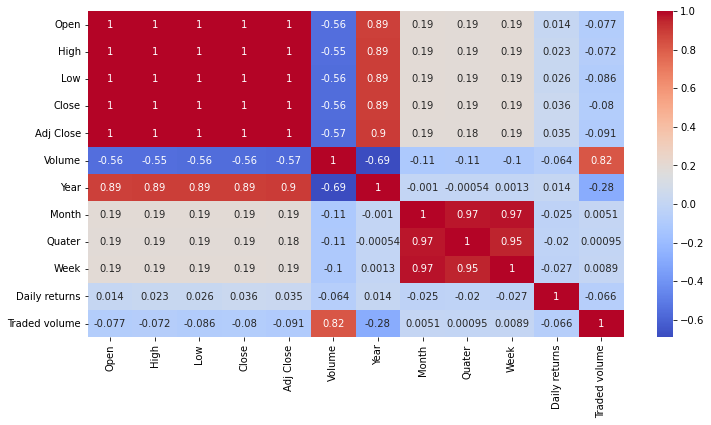

In [41]:
plt.figure(figsize=(12,6))
sns.heatmap(AAPL_df.corr(),cmap='coolwarm',annot=True)

In [43]:
AAPL_df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Quater,Week,Daily returns,Traded volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,2012,1,1,1,NaN,3.835613e+09
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,2012,1,1,1,0.005374,3.317786e+09
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,2012,1,1,1,0.011102,3.499729e+09
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,2012,1,1,1,0.010454,4.149315e+09
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,2012,1,1,2,-0.001586,5.128418e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000,2019,12,4,52,0.016318,6.950660e+09
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700,2019,12,4,52,0.000951,3.421661e+09
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300,2019,12,4,52,0.019840,6.702949e+09
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500,2019,12,4,52,-0.000379,1.052436e+10


In [52]:
#yearly adj close in each month
monthdata = pd.pivot_table(AAPL_df, values = "Adj Close", columns = "Year", index = "Month")
monthdata

Year,2012,2013,2014,2015,2016,2017,2018,2019
Month,,,,,,,,
1,52.907298,62.001166,68.617546,100.962794,91.348933,113.438282,167.736679,150.843483
2,61.424381,57.155541,67.571447,114.843638,89.269278,127.238253,162.059499,168.558006
3,71.292448,55.349688,68.484793,115.404885,97.292395,133.985138,168.895758,180.112481
4,74.810151,52.584215,69.494316,116.614644,99.598819,136.147133,164.383479,197.035945
5,69.708045,56.195146,77.804242,118.356861,89.084500,145.432150,180.027677,188.428836
6,70.928848,53.660243,83.072271,117.575884,90.707725,141.439831,183.271643,190.349968
7,74.200942,54.116633,86.453968,115.302355,92.523558,141.887732,184.913715,202.431111
8,79.595378,61.454591,89.356041,104.720600,101.552299,152.563906,207.807349,202.738817
9,84.499841,60.950956,91.356647,104.237874,104.635011,151.386422,216.531868,215.853332


Text(0, 0.5, 'Adj Close')

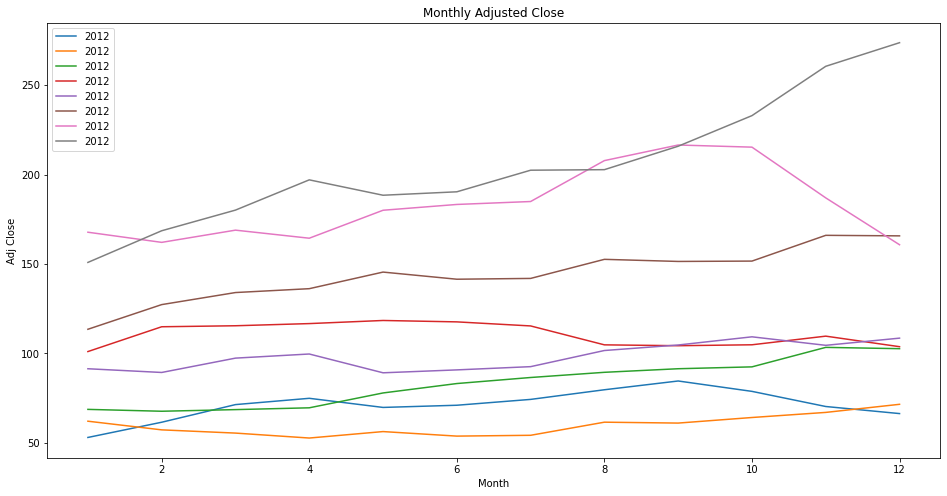

In [53]:
plt.figure(figsize=(16,8))
plt.plot(monthdata)
plt.legend(AAPL_df['Year'])
plt.title('Monthly Adjusted Close')
plt.xlabel('Month')
plt.ylabel('Adj Close')

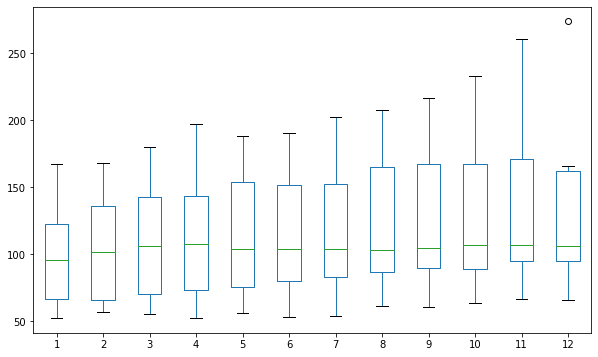

In [54]:
monthdata.T.boxplot(grid=False, figsize=(10,6))
plt.show()

In [58]:
#monthly adj close in each year
yeardata = pd.pivot_table(AAPL_df, values = "Adj Close", columns = "Month", index = "Year")

yeardata

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2012,52.907298,61.424381,71.292448,74.810151,69.708045,70.928848,74.200942,79.595378,84.499841,78.690927,70.223182,66.264659
2013,62.001166,57.155541,55.349688,52.584215,56.195146,53.660243,54.116633,61.454591,60.950956,64.068449,66.921334,71.453414
2014,68.617546,67.571447,68.484793,69.494316,77.804242,83.072271,86.453968,89.356041,91.356647,92.402407,103.307512,102.577838
2015,100.962794,114.843638,115.404885,116.614644,118.356861,117.575884,115.302355,104.720600,104.237874,104.757580,109.590705,103.690284
2016,91.348933,89.269278,97.292395,99.598819,89.084500,90.707725,92.523558,101.552299,104.635011,109.212791,104.453936,108.472418
2017,113.438282,127.238253,133.985138,136.147133,145.432150,141.439831,141.887732,152.563906,151.386422,151.586949,165.996497,165.699087
2018,167.736679,162.059499,168.895758,164.383479,180.027677,183.271643,184.913715,207.807349,216.531868,215.334475,186.944749,160.725920
2019,150.843483,168.558006,180.112481,197.035945,188.428836,190.349968,202.431111,202.738817,215.853332,232.974974,260.569057,273.780717


Text(0, 0.5, 'Adj Close')

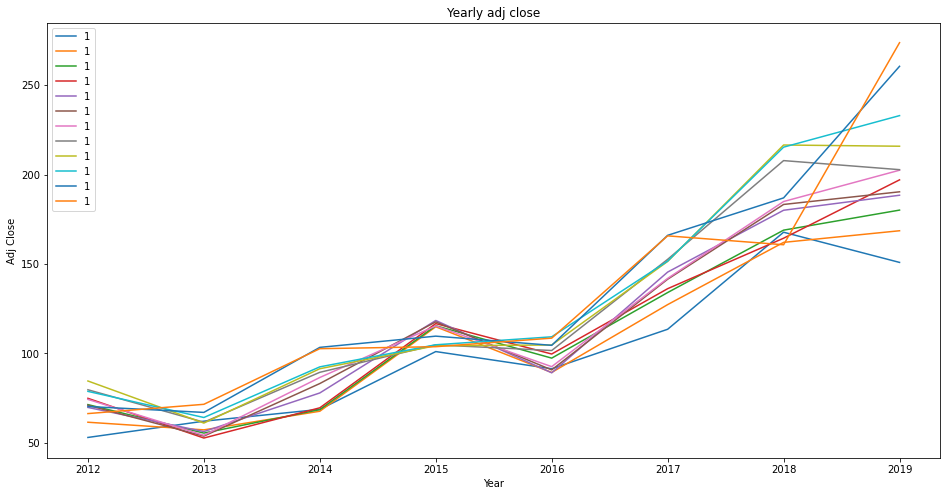

In [64]:
plt.figure(figsize=(16,8))
plt.plot(yeardata)
plt.legend(AAPL_df['Month'])
plt.title('Yearly adj close')
plt.xlabel('Year')
plt.ylabel('Adj Close')

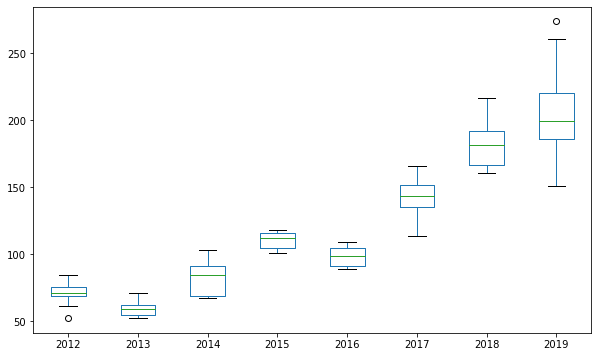

In [65]:
yeardata.T.boxplot(grid=False, figsize=(10,6))
plt.show()

here we can clearly see linear trend with multiplicative seasonality

# Time series components

In [68]:
AAPL_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Quater,Week,Daily returns,Traded volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,2012,1,1,1,NaN,3.835613e+09
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,2012,1,1,1,0.005374,3.317786e+09
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,2012,1,1,1,0.011102,3.499729e+09
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,2012,1,1,1,0.010454,4.149315e+09
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,2012,1,1,2,-0.001586,5.128418e+09


In [69]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Text(0.5, 0.98, 'Close decomposition')

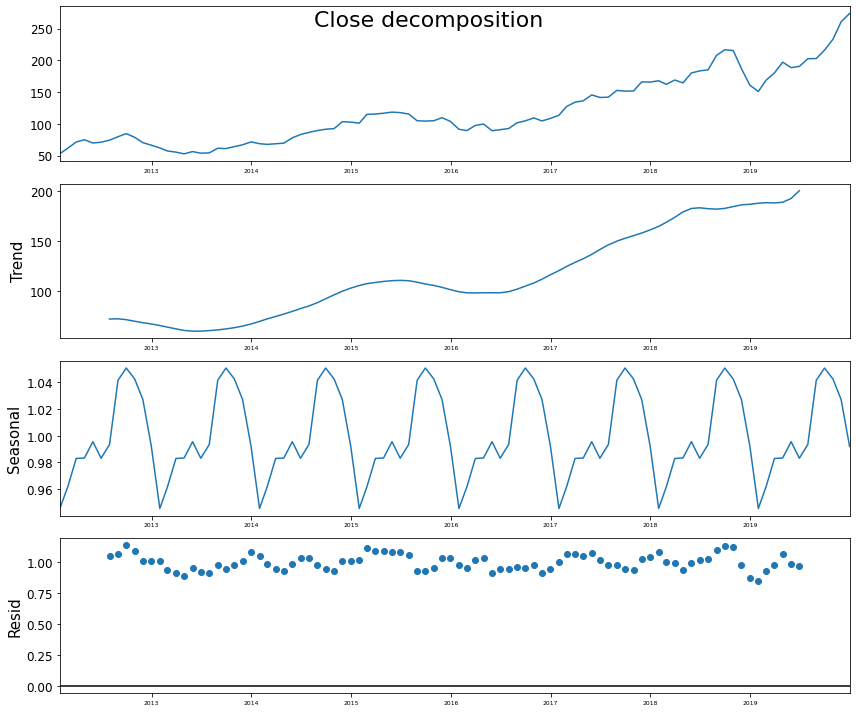

In [70]:
# Aggregating the Time Series to a monthly scaled index
y = AAPL_df[['Date','Adj Close']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean()

# Setting rcparams
rcParams['figure.figsize'] = 12, 10
rcParams['axes.labelsize'] = 15
rcParams['ytick.labelsize'] = 12
rcParams['xtick.labelsize'] = 6

# Using statistical tools of statsmodel library
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
decomp = decomposition.plot()
decomp.suptitle('Close decomposition', fontsize=22)

From the above plot we can see that, the trand component is upward trend that means that closeing price is maximum in every year.

We can see that the seasonal component changes slowly over time. But this doesn't mean years far apart won't have different seasonal patterns.

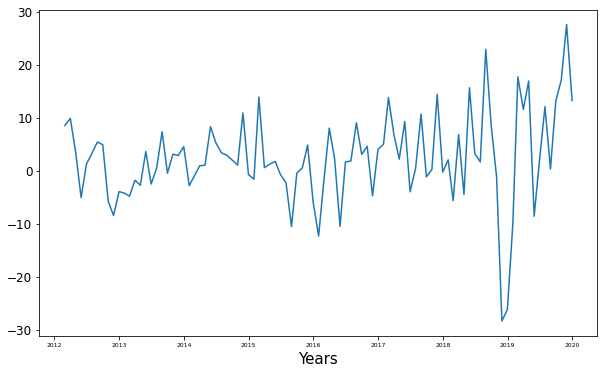

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(y.diff(periods=1))
plt.xlabel('Years')
plt.show()

Although the trend is removed after differencing, there is unequal variance which implies that the series is not stationary.

# Check Stationarity

In [44]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from sklearn.metrics import mean_squared_error, mean_absolute_error

H0: Data is Stationarity

    V/S
H1: Data is Non-Stationarity

In [45]:
from statsmodels.tsa.stattools import adfuller

In [46]:
# check for stationarity
def adf_test(series, title=''):
    
    # .dropna() handles differenced data
    result = adfuller(series.dropna(),autolag='AIC') 
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out['critical value ({})'.format(key)]=val
        
    # .to_string() removes the line "dtype: float64"
    print(out.to_string())          
    
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

# Aggregating the Time Series to a monthly scaled index
y = AAPL_df[['Date','Adj Close']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean() 

adf_test(y['Adj Close'],title='') 

ADF test statistic       1.339253
p-value                  0.996820
# lags used              3.000000
# observations          92.000000
critical value (1%)     -3.503515
critical value (5%)     -2.893508
critical value (10%)    -2.583824
Fail to reject the null hypothesis
Data is non-stationary


In [47]:
# Differencing y(t)=y(t)-y(t-1)
AAPL_df[' Adj Close First Difference'] = AAPL_df['Adj Close'] - AAPL_df['Adj Close'].shift(1)

In [48]:
## Again test dickey fuller test for first differencing
adf_test(AAPL_df[' Adj Close First Difference'].dropna())

ADF test statistic     -1.347264e+01
p-value                 3.359045e-25
# lags used             8.000000e+00
# observations          2.001000e+03
critical value (1%)    -3.433622e+00
critical value (5%)    -2.862985e+00
critical value (10%)   -2.567540e+00
Reject the null hypothesis
Data is stationary


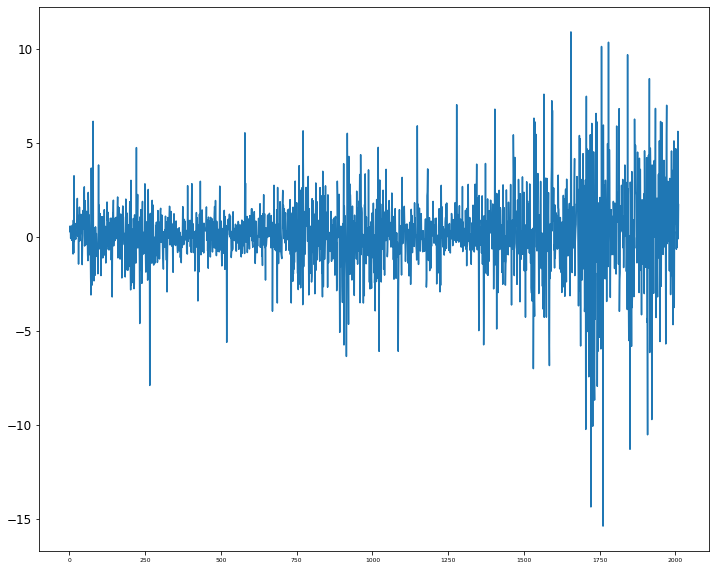

In [49]:
AAPL_df[' Adj Close First Difference'].plot()

In [50]:
# Differencing y(t)=y(t)-y(t-n)
AAPL_df['Seasonal First Difference']=AAPL_df['Adj Close']-AAPL_df['Adj Close'].shift(30)

In [51]:
## Again test dickey fuller test
adf_test(AAPL_df['Seasonal First Difference'].dropna())

ADF test statistic     -7.330152e+00
p-value                 1.133431e-10
# lags used             2.200000e+01
# observations          1.958000e+03
critical value (1%)    -3.433694e+00
critical value (5%)    -2.863017e+00
critical value (10%)   -2.567556e+00
Reject the null hypothesis
Data is stationary


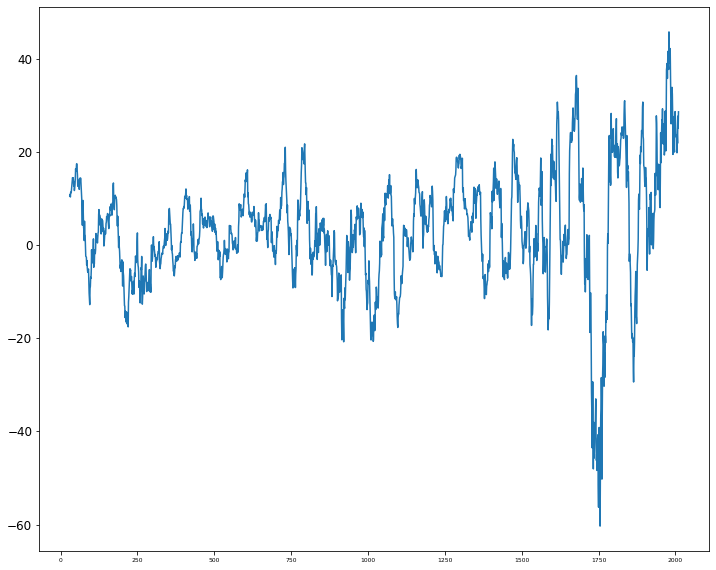

In [52]:
AAPL_df['Seasonal First Difference'].plot()

# Autocorrelation

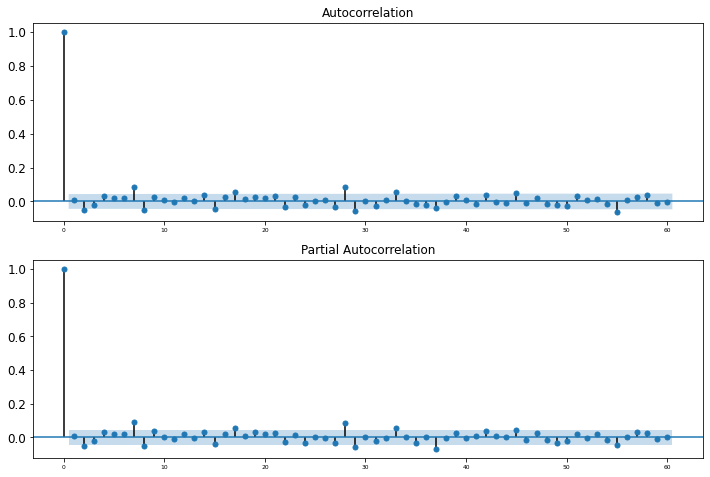

In [53]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(AAPL_df[' Adj Close First Difference'].iloc[1:],lags=60,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(AAPL_df[' Adj Close First Difference'].iloc[1:],lags=60,ax=ax2)

For autocorrelation we can see that our data is random.from the 
autocorrelation ,the y-axis is the value for the correlation between a value and its lag. The lag is on the x-axis the zero-lag has a correlation of 1 because it correlates with itself perfectly.

# Lag Scatter Plot

In [54]:
from pandas.plotting import lag_plot

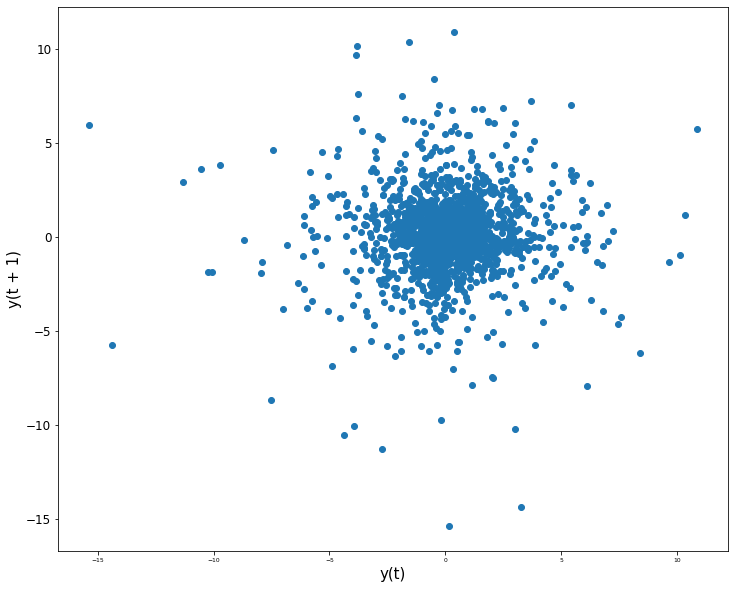

In [55]:
lag_plot(AAPL_df[' Adj Close First Difference']);
plt.show()

Here we see there is no any correlation relationship between them.